<a href="https://colab.research.google.com/github/mateusms-p4/Mateusms_Inatel/blob/master/Cluster_IN243.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [0]:
data1 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_2.csv')
data3 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_3.csv')

In [53]:

data1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0.611936,3.625010,1.701640,0.156916,-2.201926,2.785098,-0.628455,9.626628,9.444256,-4.056841,5.995159,-0.281087,1.154470,9.000359,-9.417610
1,1,1.357434,3.312884,3.073148,1.239251,-2.777790,3.843133,-2.153042,9.679152,10.798762,-3.776705,6.211661,0.507341,1.965051,8.984082,-7.759362
2,2,1.883790,3.717964,2.992826,0.643056,-0.553305,3.125165,-0.148614,8.775357,9.879644,-2.329409,4.844341,2.450292,1.119818,8.565278,-7.548463
3,3,-0.300719,5.141507,0.565156,-0.172551,-1.736033,3.522455,-2.991314,9.359687,11.136831,-1.039792,7.135197,1.496101,1.202091,7.547869,-10.570058
4,4,1.066001,4.418641,1.469452,1.196436,-1.304644,3.353065,-1.294004,7.885358,8.337725,-2.043782,6.194928,0.986047,-0.579824,9.956768,-8.386418


In [54]:
data2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,1.499547,4.132241,2.827058,1.721168,0.636332,4.254410,-1.617438,7.596081,10.372915,-1.675906
1,1,1.616402,2.686831,2.030941,0.159633,-1.246979,2.819732,-0.338077,8.152678,10.059583,-2.797589
2,2,0.031824,3.893738,2.038247,1.276815,0.732405,2.875625,-2.204201,7.489478,8.809659,-1.849688
3,3,-0.564527,4.367049,2.211774,1.129845,-2.124220,2.679961,-2.672317,7.342140,8.730394,-1.915120
4,4,-0.179912,5.084985,3.549752,-1.172321,-1.100645,3.594790,-1.885693,7.438188,9.140375,-2.628961


In [55]:
data3.head()

,Unnamed: 0,0,1
0,0,2.843828,3.326509
1,1,1.926358,4.152430
2,2,0.873051,4.714386
3,3,1.120314,5.758061
4,4,1.737308,4.425462


In [0]:
data1.drop(['Unnamed: 0'], axis=1, inplace=True)
data2.drop(['Unnamed: 0'], axis=1, inplace=True)
data3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)
scaled_data2 = scaler.fit_transform(data2)
scaled_data3 = scaler.fit_transform(data3)

In [0]:
def get_kmeans(n_clusters, dataset):
    model = KMeans(n_clusters=n_clusters)
    model.fit(dataset)
    return [n_clusters, model.inertia_]

In [0]:
result_data1 = [get_kmeans(n_grupos, scaled_data1) for n_grupos in range(1,21)]
result_data2 = [get_kmeans(n_grupos, scaled_data2) for n_grupos in range(1,21)]
result_data3 = [get_kmeans(n_grupos, scaled_data3) for n_grupos in range(1,21)]

In [0]:
df_result_data1 = pd.DataFrame(result_data1, columns = ['groups', 'inertia'])
df_result_data2 = pd.DataFrame(result_data2, columns = ['groups', 'inertia'])
df_result_data3 = pd.DataFrame(result_data3, columns = ['groups', 'inertia'])

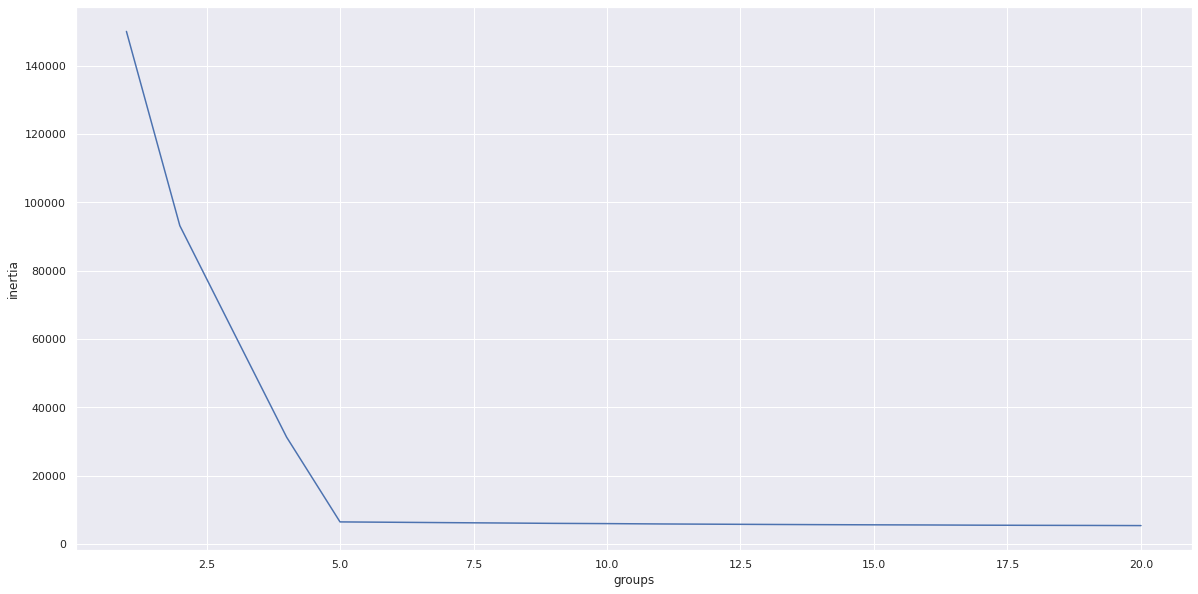

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(x='groups', y='inertia', data=df_result_data1)

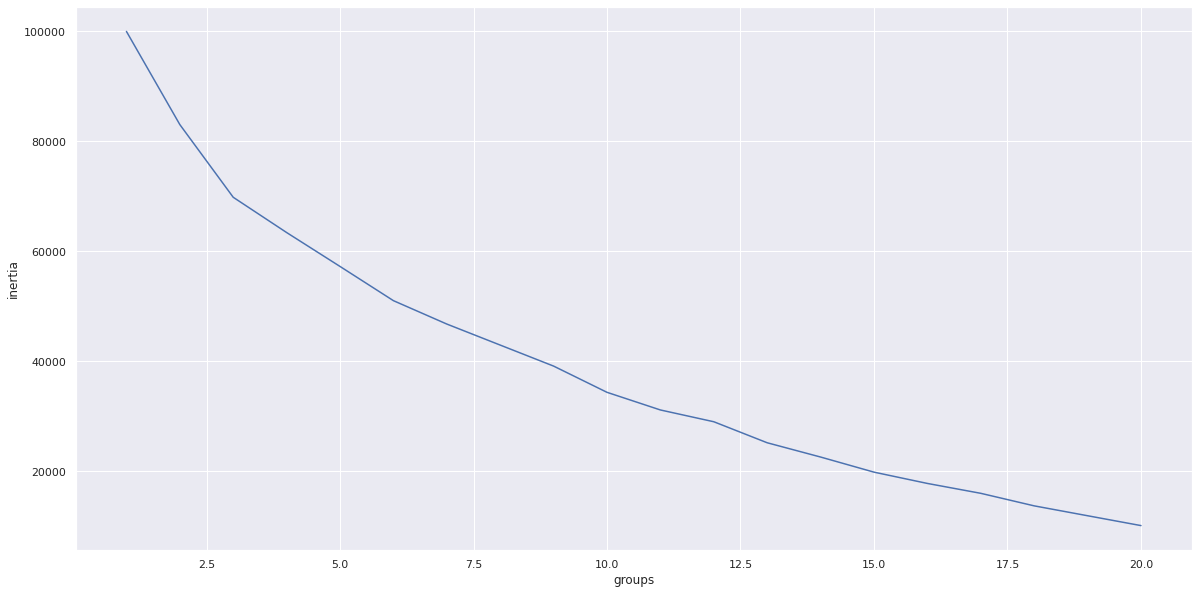

In [64]:
plt.figure(figsize=(20,10))
sns.lineplot(x='groups', y='inertia', data=df_result_data2)

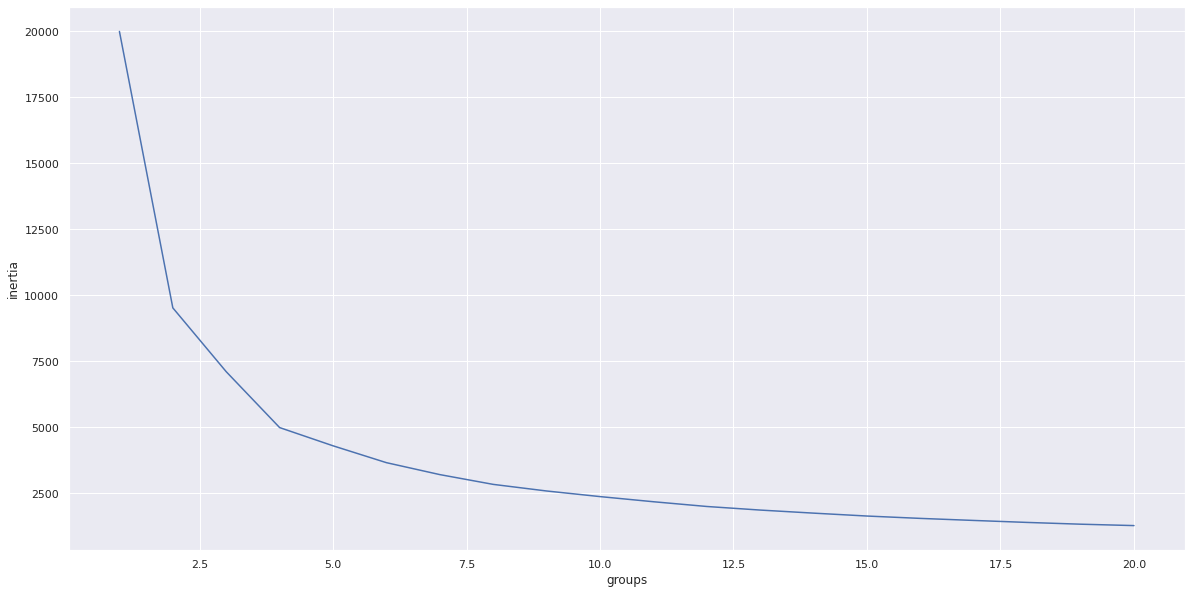

In [65]:
plt.figure(figsize=(20,10))
sns.lineplot(x='groups', y='inertia', data=df_result_data3)

In [66]:
model = KMeans(n_clusters=2)
model.fit(scaled_data3)
model.labels_

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
df_model_labels = pd.DataFrame(model.labels_)
df_data3_2clusters = pd.concat([data3, df_model_labels], axis=1)
df_data3_2clusters.columns = ['x','y','cluster']

In [68]:
df_data3_2clusters.head()

,x,y,cluster
0,2.843828,3.326509,1
1,1.926358,4.152430,0
2,0.873051,4.714386,0
3,1.120314,5.758061,0
4,1.737308,4.425462,0


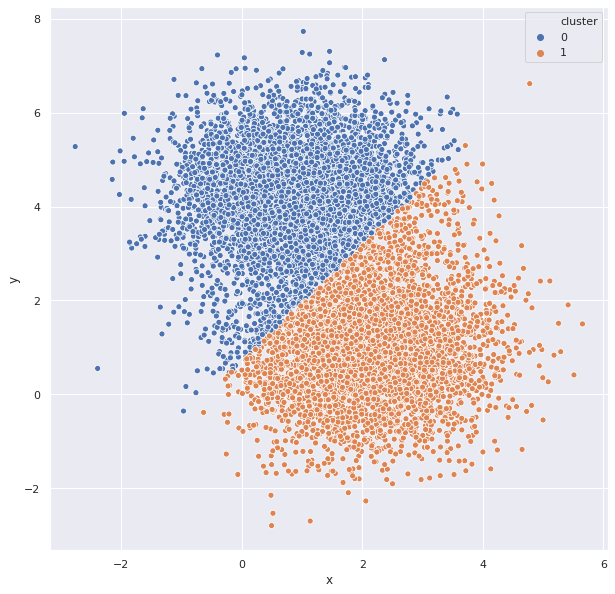

In [69]:
sns.set(rc={'figure.figsize': (10,10)})
sns.scatterplot(x='x', y='y', hue='cluster', data=df_data3_2clusters)